In [ ]:
!git clone https://github.com/orannahum/Data_of_Self_Driving.git

fatal: destination path 'Data_of_Self_Driving' already exists and is not an empty directory.


In [ ]:
!ls Data_of_Self_Driving

driving_log_updated.csv  IMG


In [ ]:
!pip3 install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import ntpath
import random
from imgaug import augmenters as iaa

In [ ]:
data_dir = 'Data_of_Self_Driving'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(data_dir, 'driving_log_updated.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

<ipython-input-27-1a1ad5cf6c62>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


center  \
0  C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\center_2022_12_27_13_58_40_129.jpg   
1  C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\center_2022_12_27_13_58_40_230.jpg   
2  C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\center_2022_12_27_13_58_40_333.jpg   
3  C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\center_2022_12_27_13_58_40_435.jpg   
4  C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\center_2022_12_27_13_58_40_536.jpg   

                                                                                                             left  \
0   C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\left_2022_12_27_13_58_40_129.jpg   
1   C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\left_2022_12_27_13_58_40_230.jpg   
2   C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\left_2022_12_27_13_58_40_333.jpg   
3   C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\left_2022_12_27_13_58_40_435.jpg   
4   C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\left_2022_12_27_13_58_40_536.jpg   

                                                                                                             right  \
0   C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\right_2022_12_27_13_58_40_129.jpg   
1   C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\right_2022_12_27_13_58_40_230.jpg   
2   C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\right_2022_12_27_13_58_40_333.jpg   
3   C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\right_2022_12_27_13_58_40_435.jpg   
4   C:\Users\Oran Nahum\Self-Driving Car Course - Applied Deep Learning\Data\IMG\right_2022_12_27_13_58_40_536.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.000079  
1  0.0       0.0       0.0      0.000079  
2  0.0       0.0       0.0      0.000082  
3  0.0       0.0       0.0      0.000079  
4  0.0       0.0       0.0      0.000080

In [ ]:
len(data)

2969

In [ ]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

In [ ]:
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2022_12_27_13_58_40_129.jpg  left_2022_12_27_13_58_40_129.jpg   
1  center_2022_12_27_13_58_40_230.jpg  left_2022_12_27_13_58_40_230.jpg   
2  center_2022_12_27_13_58_40_333.jpg  left_2022_12_27_13_58_40_333.jpg   
3  center_2022_12_27_13_58_40_435.jpg  left_2022_12_27_13_58_40_435.jpg   
4  center_2022_12_27_13_58_40_536.jpg  left_2022_12_27_13_58_40_536.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2022_12_27_13_58_40_129.jpg  0.0       0.0       0.0      0.000079  
1  right_2022_12_27_13_58_40_230.jpg  0.0       0.0       0.0      0.000079  
2  right_2022_12_27_13_58_40_333.jpg  0.0       0.0       0.0      0.000082  
3  right_2022_12_27_13_58_40_435.jpg  0.0       0.0       0.0      0.000079  
4  right_2022_12_27_13_58_40_536.jpg  0.0       0.0       0.0      0.000080

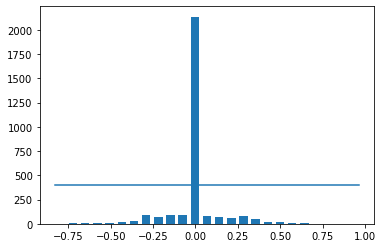

In [ ]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [ ]:
print('total data:', len(data))

total data: 2969


In [ ]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

In [ ]:
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 1735
remaining: 1234


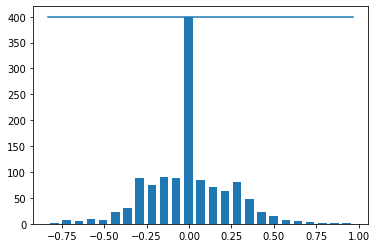

In [ ]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [ ]:
print(data.iloc[1])


center      center_2022_12_27_13_58_40_943.jpg
left        left_2022_12_27_13_58_40_943.jpg  
right       right_2022_12_27_13_58_40_943.jpg 
steering   -0.292007                          
throttle    0.959581                          
reverse     0.0                               
speed       1.840363                          
Name: 8, dtype: object


In [ ]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [ ]:
image_paths, steerings = load_img_steering(data_dir + '/IMG', data)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 2961
Valid Samples: 741


Text(0.5, 1.0, 'Validation set')

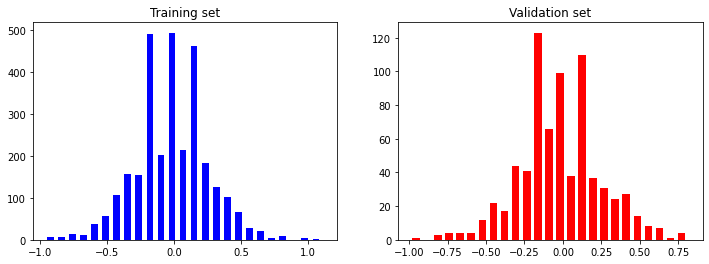

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [ ]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Zoomed Image')

In [ ]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Panned Image')

In [ ]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

Text(0.5, 1.0, 'Brightness altered image ')

In [ ]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]
 
 
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.0834336')

In [ ]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle

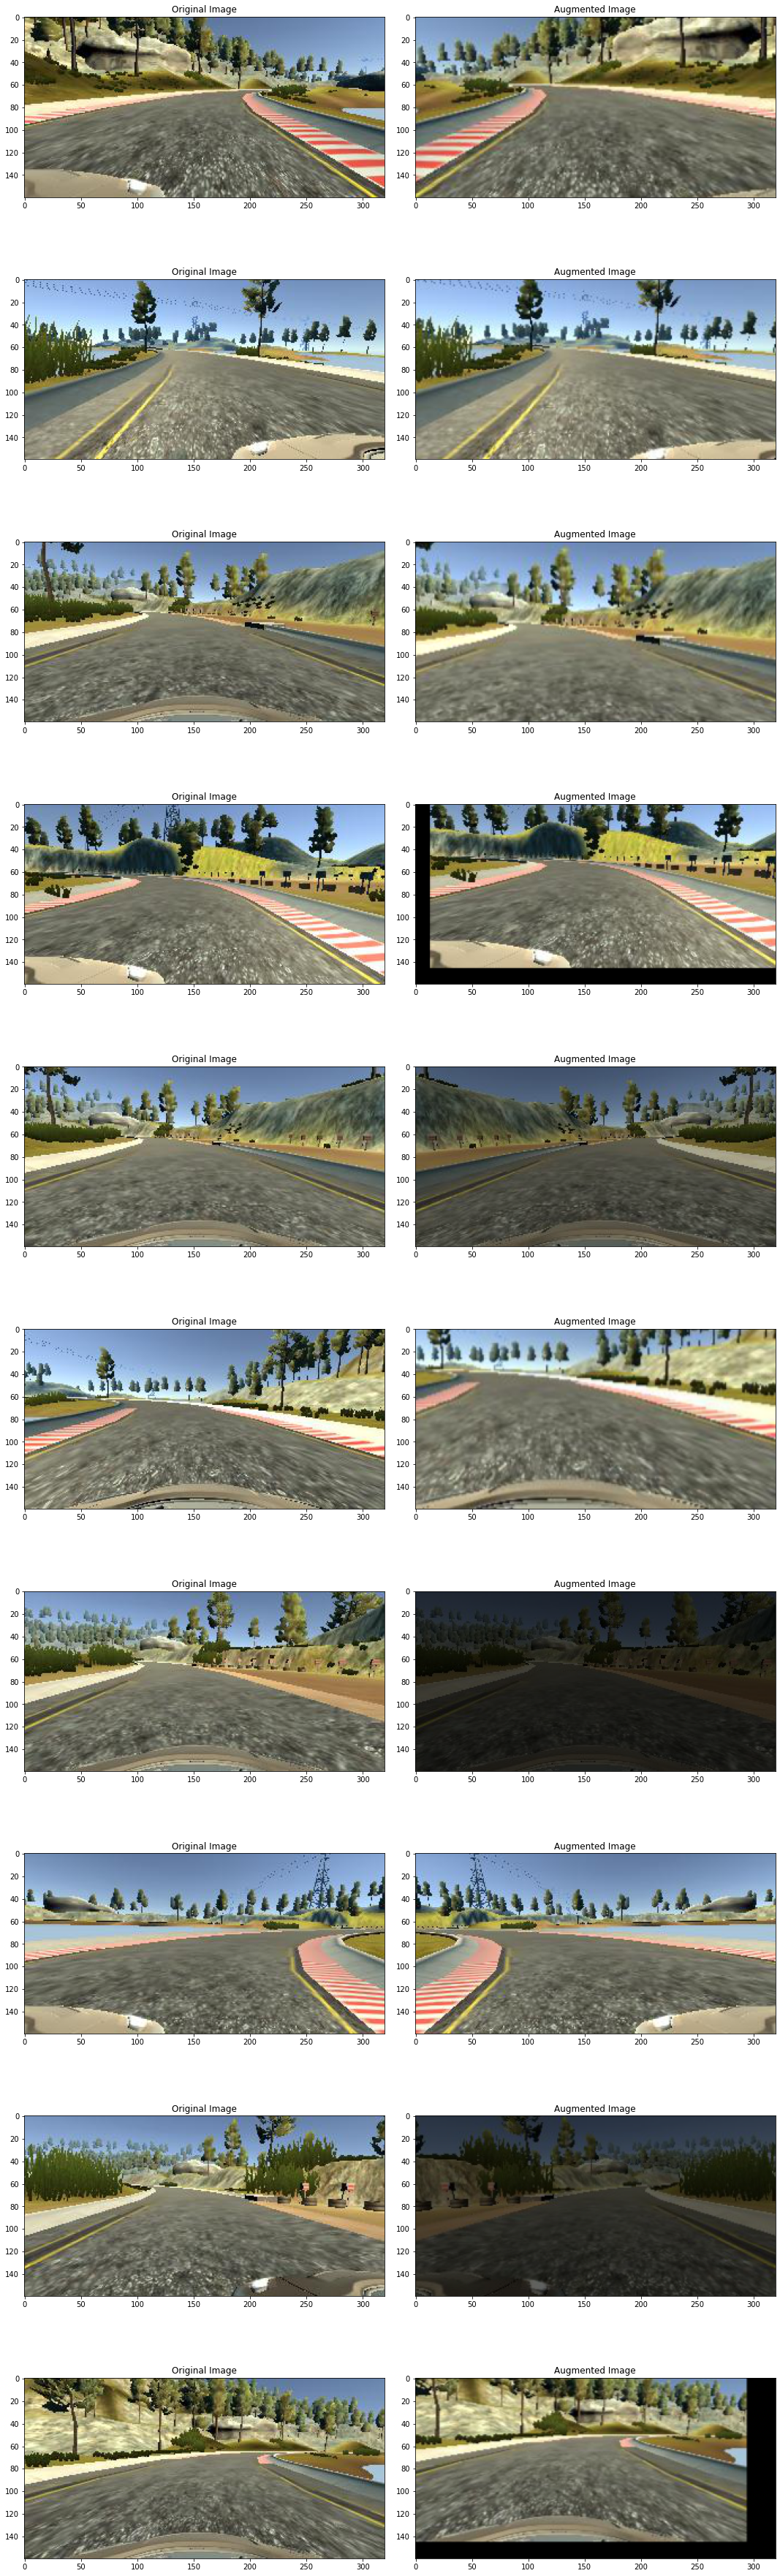

In [ ]:
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [ ]:
def img_preprocess(img):
 #   img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

In [ ]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

Text(0.5, 1.0, 'Preprocessed Image')

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))  

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

Text(0.5, 1.0, 'Validation Image')

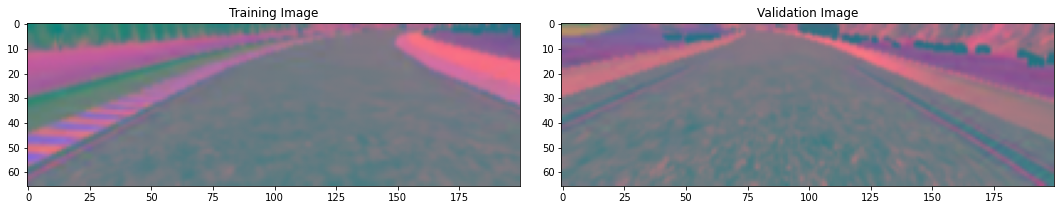

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [ ]:
def nvidia_model():
 
  model = Sequential()
  
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu'))
  
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
#  model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
 # model.add(Dropout(0.5))
  
  
  model.add(Dense(50, activation='elu'))
#  model.add(Dropout(0.5))
  model.add(Dense(10, activation ='elu'))
#  model.add(Dropout(0.5))
  model.add(Dense(1))
  
  
  optimizer= Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  
  return model


In [ ]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/10
300/300 [==============================] - 136s 436ms/step - loss: 0.0618 - val_loss: 0.0464
Epoch 2/10
300/300 [==============================] - 127s 425ms/step - loss: 0.0527 - val_loss: 0.0415
Epoch 3/10
300/300 [==============================] - 125s 417ms/step - loss: 0.0507 - val_loss: 0.0401
Epoch 4/10
300/300 [==============================] - 125s 417ms/step - loss: 0.0471 - val_loss: 0.0353
Epoch 5/10
300/300 [==============================] - 125s 419ms/step - loss: 0.0447 - val_loss: 0.0360
Epoch 6/10
300/300 [==============================] - 125s 417ms/step - loss: 0.0420 - val_loss: 0.0346
Epoch 7/10
300/300 [==============================] - 125s 417ms/step - loss: 0.0410 - val_loss: 0.0327
Epoch 8/10
300/300 [==============================] - 125s 419ms/step - loss: 0.0399 - val_loss: 0.0337
Epoch 9/10
300/300 [==============================] - 124s 414ms/step - loss: 0.0391 - val_loss: 0.0316
Epoch 10/10
300/300 [==============================] - 124s 414m

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

In [ ]:
model.save('model.h5')
from google.colab import files


In [ ]:
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>